<a href="https://colab.research.google.com/github/baliga-lab/Google-colab-notebooks/blob/master/Scanlag_colab_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# A program to analyze scanlag images

In [ ]:
!rm -rf Scanlag/
! git clone https://github.com/baliga-lab/Scanlag.git

Cloning into 'Scanlag'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 31 (delta 15), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [ ]:
from Scanlag import scanlag_analyzer as sa

In [ ]:
# Import folders from google drive
# The data should be in the users account. If not, upload the data.

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Folders with scanlag images
analysis_dir = "/content/drive/MyDrive/Scanlag_analysis/Vivek_scanlag_analysis/CEE_scanlag_analysis"
scanned_images = "/content/drive/MyDrive/Scanlag_analysis/Vivek_scanlag_analysis/CEE_Amy/Amy_Scanlag_CEE6_line1_031020"

In [ ]:
# Initite analysis
output_dir = sa.inittiate_analysis(analysis_dir,scanned_images)
#output_dir = "/content/drive/MyDrive/Scanlag_analysis/Vivek_scanlag_analysis/Evolution_of_LLR"

In [ ]:
print(output_dir)

/content/drive/MyDrive/Scanlag_analysis/Vivek_scanlag_analysis/CEE_scanlag_analysis/Amy_Scanlag_CEE6_line1_031020


In [ ]:
# Identify plates

plate_pos = sa.find_plates(output_dir,scanned_images)

*   Examine the annotatted image. Plates that are not identified should be added manually. This can be done using ImageJ program. plate locations should be added as - 
  `plate_pos["n"]: [x,y,550]` ; where, 
  n: plate number, x&y: x,y co-ordinates of the center of plates found with ImageJ. 
*   Name the plates by examining the annotated scan image



In [ ]:
# Name plates

plate_names = {"1":"L1C2","2":"L1C4","3":"L1C1","4":"Msm","5":"L1C3"}#Do use space, pound sign (#) or underscores (_) in names

In [ ]:
# Crop plates

cropped_plates, max_times = sa.crop_plates(scanned_images,output_dir,plate_pos,plate_names)

In [ ]:
print(cropped_plates)
print(max_times)

/content/drive/MyDrive/Scanlag_analysis/Vivek_scanlag_analysis/CEE_scanlag_analysis/Amy_Scanlag_CEE6_line1_031020/cropped_images
[2743, 2743, 2743, 2743, 2743]


In [ ]:
#cropped_plates = "/content/drive/MyDrive/Scanlag_analysis/Vivek_scanlag_analysis/Evolution_of_LLR/Cropped_images"
plates_to_analyze = ["L1C1","L1C2","L1C3","L1C4","Msm"]
max_times = [1767,1524,1828,1646,1646]

In [ ]:
# Define parameters

size = [100,700] #This is the range of colony sizes that is allowed.\
                  #Decrease if upper bound if doublets are identified as colonies.\
                  #Increase if lower bound if anamolies such as bubbles and shadows are identified as CFUs.

#plates_to_analyze = [i for i in plate_names.values() if i not in ["#"]]#This can be changed to skip plates 

times_to_annotate = max_times #Time list are the times from which images are used to identify CFUs, \
                             #maximum times are used as a default \
                             #it can be reduced if the CFUs are overgrown and are overlapping each other.


growth = sa.get_growth(cropped_plates,plates_to_analyze,times_to_annotate,size,output_dir)
growth_normalized_to_spots = sa.normalize_to_spots(growth)

In [ ]:
growth_normalized_to_spots.to_csv(output_dir+"/Growth_normalized.csv")

In [ ]:
growth_normalized_to_spots.head()

,Cell_type,Time,Spot,Spot_loc,Growth,Growth_normalized
L1C1_0_1828,L1C1,1828.0,L1C1_0,6_871_12,36458.0,9684.0
L1C1_1_1828,L1C1,1828.0,L1C1_1,2_717_11,14384.0,3963.0
L1C1_2_1828,L1C1,1828.0,L1C1_2,2_650_8,11017.0,2492.0
L1C1_3_1828,L1C1,1828.0,L1C1_3,12_503_13,44340.0,10927.0
L1C1_4_1828,L1C1,1828.0,L1C1_4,2_369_17,39952.0,9472.0


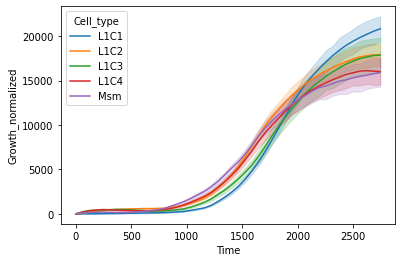

In [ ]:
# Plot spot intensity vs time

import seaborn as sns
from matplotlib import pyplot as plt

ax = sns.lineplot(x="Time",y="Growth_normalized",hue="Cell_type",data=growth_normalized_to_spots)
plt.show()

Inspect time vs growth plot and identify the time to use for TOA identification

In [ ]:
# Calculate time of appearance
#By looking at time vs growth graph select the pixel density threshold to which TOA will be calculated 
pixel_threshold = 15000
time_of_appearance = sa.get_time_of_appearance(growth_normalized_to_spots,pixel_threshold)

In [ ]:
time_of_appearance.head()

,TOA,Cell_type,Spot_loc
Spot,,,
3A_0,2070.0,3A,135_231_17
3A_1,1932.0,3A,177_795_17
3A_2,1932.0,3A,562_507_19
3A_3,1932.0,3A,730_246_19
3A_4,1794.0,3A,745_440_21


In [ ]:
time_of_appearance.to_csv(output_dir+"Time_of_appearance.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

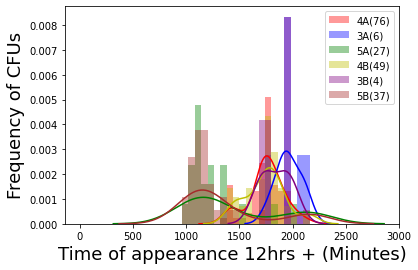

In [ ]:
# Plot TOA
colors = ["r","b","g","y","purple","brown"]
sa.plot_toa_dist(time_of_appearance,plates_to_analyze,colors)